# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor

# Definitions

In [2]:
base_path = "C:/Users/Zi/Documents/data-science-crossfit/"

# Model Building

In [3]:
df_games_and_open = pd.read_csv(base_path + "csv_files/version_2_clean_data/df_games_and_open.csv")
df_games_and_open = df_games_and_open[df_games_and_open['year'] != 2023]
df_games_and_open = df_games_and_open.select_dtypes(include=[np.number]).drop(columns=['year','overallRank'])

In [4]:
df_games_and_open

,competitorId,genderId,age,ageNull,height,heightNull,weight,weightNull,bmi,bmiNull,affiliateId,countryOfOriginCode,regionId,statusId,overallScore,openCompetitor,openRank,openScore,gamesCompetitions,openCompetitions
0,1616,1,20,0,178.000000,0,83.000000,0,26.196187,0,0,0,0,1,232,0,1000,5000,1,0
1,1616,1,21,0,178.000000,0,83.000000,0,26.196187,0,0,0,0,1,21,0,1000,5000,2,0
2,1685,1,29,0,163.000000,0,82.000000,0,30.863036,0,0,0,0,1,19,0,1000,5000,1,0
3,1690,1,23,0,181.000000,0,93.000000,0,28.387412,0,7104,1,1,1,483,1,17,566,1,1
4,1690,1,25,0,181.000000,0,93.000000,0,28.387412,0,7104,1,1,1,702,1,3,86,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1709,2377148,2,27,1,165.374825,1,65.663854,1,24.013081,1,0,0,0,1,237,0,1000,5000,1,1
1710,2377149,2,27,1,165.374825,1,65.663854,1,24.013081,1,0,0,0,2,162,0,1000,5000,1,1
1711,2377150,2,27,1,165.374825,1,65.663854,1,24.013081,1,0,0,0,2,81,0,1000,5000,1,1
1712,2377151,2,27,1,165.374825,1,65.663854,1,24.013081,1,0,0,0,2,76,0,1000,5000,1,1


### Splits

#####  X and y

In [5]:
X = df_games_and_open.copy()
y = X.pop('overallScore')

In [6]:
X.shape

(1633, 19)

In [7]:
y.shape

(1633,)

##### Train and test

In [8]:
train_X, val_X, train_y, val_y = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=1)

In [9]:
train_X.shape

(1306, 19)

In [10]:
train_y.shape

(1306,)

In [11]:
val_X.shape

(327, 19)

In [12]:
val_y.shape

(327,)

### Linear regressions

##### Multiple linear regression

In [13]:
X_sm = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           overallScore   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     108.3
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          2.67e-271
Time:                        12:51:25   Log-Likelihood:                -10941.
No. Observations:                1633   AIC:                         2.192e+04
Df Residuals:                    1613   BIC:                         2.203e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 635.5002    733.175      0.867      0.386    -802.575    2073.576
competitorId        -4.797e-06   1.89e-05     -0.254      0.799   -4.18e-05    3.22e-05
genderId               33.9727     20.760      1.636      0.102      -6.746      74.692
age                    -6.4984      1.150     -5.652      0.000      -8.754      -4.243
ageNull               -12.4838     49.900     -0.250      0.802    -110.360      85.392
height                 -0.8447      4.267     -0.198      0.843      -9.215       7.525
heightNull             20.2601     66.958      0.303      0.762    -111.074     151.594
weight                  2.3172      4.648      0.498      0.618      -6.801      11.435
weightNull             -5.9811     56.090     -0.107      0.915    -115.998     104.036
bmi                    -6.9725     13.600     -0.513      0.608     -33.649      19.704
bmiNull               -28.2535     84.689     -0.334      0.739    -194.365     137.858
affiliateId            -0.0033      0.001     -3.523      0.000      -0.005      -0.001
countryOfOriginCode    -1.1035      0.383     -2.879      0.004      -1.855      -0.352
regionId               -1.8291      2.971     -0.616      0.538      -7.657       3.999
statusId              -53.4749      3.776    -14.162      0.000     -60.881     -46.068
openCompetitor        157.2588     31.475      4.996      0.000      95.523     218.994
openRank               -0.0728      0.055     -1.324      0.186      -0.181       0.035
openScore              -0.0151      0.009     -1.678      0.094      -0.033       0.003
gamesCompetitions      55.7323      4.630     12.037      0.000      46.651      64.814
openCompetitions      -12.0718      4.092     -2.950      0.003     -20.099      -4.045
==============================================================================
Omnibus:                       40.854   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.810
Skew:                          -0.084   Prob(JB):                     8.55e-20
Kurtosis:                       4.124   Cond. No.                     9.68e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.68e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Linear regression

In [14]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(train_X, train_y)
linear_regression_predictions = linear_regression_model.predict(val_X)
mean_absolute_error(val_y, linear_regression_predictions)

155.09281619674599

In [15]:
mean_absolute_percentage_error(val_y, linear_regression_predictions)

1.0821806429928304e+17

In [16]:
np.mean(cross_val_score(linear_regression_model, train_X, train_y, scoring='neg_mean_absolute_error', cv=3))

-150.3081739192815

##### Lasso regression

In [17]:
lasso_regression_model = Lasso(max_iter=10000)
lasso_regression_model.fit(train_X, train_y)
lasso_regression_predictions = lasso_regression_model.predict(val_X)
mean_absolute_error(val_y, lasso_regression_predictions)

153.80783682763632

In [18]:
mean_absolute_percentage_error(val_y, lasso_regression_predictions)

1.0840246860438851e+17

In [19]:
np.mean(cross_val_score(lasso_regression_model, train_X, train_y, scoring='neg_mean_absolute_error', cv=3))

-149.89903440022326

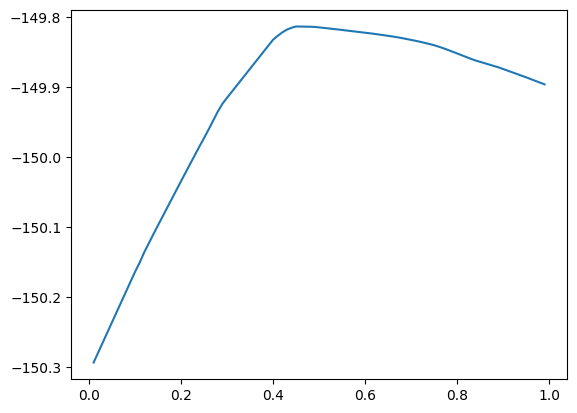

In [20]:
alpha = []
error = []
for i in range (1, 100):
    alpha.append(i/100)
    model = Lasso(alpha=(i/100), max_iter=10000)
    error.append(np.mean(cross_val_score(model, train_X, train_y, scoring='neg_mean_absolute_error', cv=3)))
plt.plot(alpha, error)

In [21]:
err = tuple(zip(alpha, error))
df_err = pd.DataFrame(err,columns=['alpha', 'error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
44,0.45,-149.813875


### Non-linear regressions

##### Decision tree

In [22]:
decision_tree_model = DecisionTreeRegressor(random_state=1)
decision_tree_model.fit(train_X, train_y)
decision_tree_predictions = decision_tree_model.predict(val_X)
mean_absolute_error(val_y, decision_tree_predictions)

142.58409785932722

In [23]:
mean_absolute_percentage_error(val_y, decision_tree_predictions)

4.218509375729611e+16

In [24]:
np.mean(cross_val_score(decision_tree_model, train_X, train_y, scoring='neg_mean_absolute_error', cv=3))

-135.08946184400153

In [25]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

for max_leaf_nodes in range(5, 100, 5):
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  120
Max leaf nodes: 10  		 Mean Absolute Error:  112
Max leaf nodes: 15  		 Mean Absolute Error:  114
Max leaf nodes: 20  		 Mean Absolute Error:  111
Max leaf nodes: 25  		 Mean Absolute Error:  114
Max leaf nodes: 30  		 Mean Absolute Error:  113
Max leaf nodes: 35  		 Mean Absolute Error:  114
Max leaf nodes: 40  		 Mean Absolute Error:  111
Max leaf nodes: 45  		 Mean Absolute Error:  112
Max leaf nodes: 50  		 Mean Absolute Error:  114
Max leaf nodes: 55  		 Mean Absolute Error:  117
Max leaf nodes: 60  		 Mean Absolute Error:  118
Max leaf nodes: 65  		 Mean Absolute Error:  118
Max leaf nodes: 70  		 Mean Absolute Error:  118
Max leaf nodes: 75  		 Mean Absolute Error:  118
Max leaf nodes: 80  		 Mean Absolute Error:  117
Max leaf nodes: 85  		 Mean Absolute Error:  117
Max leaf nodes: 90  		 Mean Absolute Error:  117
Max leaf nodes: 95  		 Mean Absolute Error:  121


In [26]:
scores = {max_leaf_nodes: get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y) for max_leaf_nodes in range(5, 100, 1)}
best_tree_size = min(scores, key=scores.get)
best_tree_size

20

##### Random forest

In [27]:
random_forest_model = RandomForestRegressor(random_state=1)
random_forest_model.fit(train_X, train_y)
random_forest_predictions = random_forest_model.predict(val_X)
mean_absolute_error(val_y, random_forest_predictions)

102.35018348623854

In [28]:
mean_absolute_percentage_error(val_y, random_forest_predictions)

4.888554101941238e+16

In [29]:
np.mean(cross_val_score(random_forest_model, train_X, train_y, scoring='neg_mean_absolute_error', cv=3))

-104.80658176034306

In [30]:
model_1 = RandomForestRegressor(n_estimators=100, criterion='absolute_error', random_state=1)
model_2 = RandomForestRegressor(n_estimators=200, min_samples_split=20, random_state=1)
model_3 = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=1)
models = [model_1, model_2, model_3]

def score_model(model, X_t, X_v, y_t, y_v):
    model.fit(X_t, y_t)
    prediction = model.predict(X_v)
    return mean_absolute_error(y_v, prediction)

for i in range(0, len(models)):
    mae = score_model(models[i], train_X, val_X, train_y, val_y)
    print("Model %d MAE: %d" % (i+1, mae))

Model 1 MAE: 101
Model 2 MAE: 100
Model 3 MAE: 102


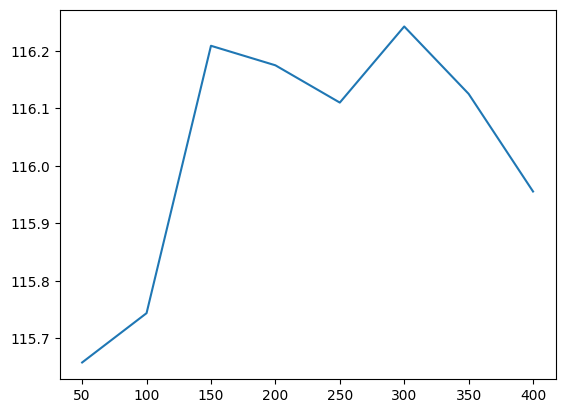

In [31]:
def get_score(n_estimators):
    my_pipeline = Pipeline(steps=[
        ('model', RandomForestRegressor(n_estimators, random_state=1))])
    scores = -1 * cross_val_score(my_pipeline, X, y, cv=3, scoring='neg_mean_absolute_error')
    return scores.mean()

results = {}
for i in range (1,9):
    results[50*i] = get_score(50*i)

plt.plot(list(results.keys()), list(results.values()))
plt.show()

In [32]:
n_estimators_best = min(results, key=results.get)
n_estimators_best

50

In [33]:
parameters = {'n_estimators':range(10,300,10),
              'criterion':('squared_error','absolute_error'),
              'max_features':('auto','sqrt','log2')}
grid_search_model = GridSearchCV(random_forest_model, parameters, scoring='neg_mean_absolute_error', cv=3)
grid_search_model.fit(train_X,train_y)

C:\Users\Zi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
174 fits failed out of a total of 522.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
174 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Zi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Zi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\P

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1),
             param_grid={'criterion': ('squared_error', 'absolute_error'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [34]:
grid_search_model.best_score_

-108.48524201808196

In [35]:
grid_search_model.best_estimator_

RandomForestRegressor(criterion='absolute_error', max_features='sqrt',
                      n_estimators=290, random_state=1)

##### XGB Regressor

In [36]:
xgb_model = XGBRegressor(random_state=1)
xgb_model.fit(train_X, train_y)
xgb_predictions = xgb_model.predict(val_X)
mean_absolute_error(val_y, xgb_predictions)

107.30719027506467

In [37]:
mean_absolute_percentage_error(val_y, xgb_predictions)

4.740738961469668e+16

In [38]:
np.mean(cross_val_score(xgb_model, train_X, train_y, scoring='neg_mean_absolute_error', cv=3))

-113.20104628951337

In [39]:
xgb_model_2 = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4, early_stopping_rounds=5)
xgb_model_2.fit(train_X, train_y, eval_set=[(val_X, val_y)], verbose=False)
xgb_predictions_2 = xgb_model_2.predict(val_X)
mean_absolute_error(val_y, xgb_predictions_2)

101.16647833130047